# Day 19 Random Forest Learning

### Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition by Aurélien Géron 
**Chpt 6: Decision Trees**

In [21]:
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier

In [1]:
iris = load_iris()
X = iris.data[:,2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [3]:
image_path = Path('../data')

In [5]:
export_graphviz(tree_clf,
                out_file=str(image_path.joinpath('iris_tree.dot')),
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True
               )

In [8]:
#! dot -Tpng {image_path}/iris_tree.dot -o {image_path}/iris_tree.png

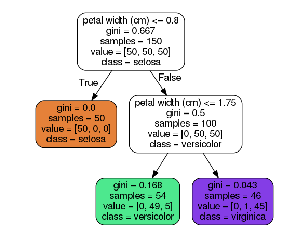

In [17]:
img=mpimg.imread(str(image_path.joinpath('iris_tree.png')))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

Scikit-Learn uses the Classification And Regression Tree (CART) algorithm, which produces only binary trees: nonleaf nodes always have two children (i.e., questions only have yes/no answers). However, other algorithms such as ID3 can produce Decision Trees with nodes that have more than two children.

The idea is really quite simple: the algorithm first splits the training set in two subsets using a single feature k and a threshold tk. The cost function used to produce the pureset subsets. 

The CART algorithm is a greedy algorithm: it greedily searches for an optimum split at the top level, then repeats the process at each level. It does not check whether or not the split will lead to the lowest possible impurity several levels down. A greedy algorithm often produces a reasonably good solution, but it is not guaranteed to be the optimal solution.

To avoid overfitting the training data, you need to restrict the Decision Tree’s freedom during training. As you know by now, this is called regularization. The regularization hyperparameters depend on the algorithm used, but generally you can at least restrict the maximum depth of the Decision Tree. 

**Chapter 7. Ensemble Learning and Random Forests**

If you aggregate the predictions of a group of predictors (such as classifiers or regressors), you will often get better predictions than with the best individual predictor. A group of predictors is called an ensemble; thus, this technique is called Ensemble Learning, and an Ensemble Learning algorithm is called an Ensemble method.

For example, you can train a group of Decision Tree classifiers, each on a different random subset of the training set. To make predictions, you just obtain the predictions of all individual trees, then predict the class that gets the most votes.

Such an ensemble of Decision Trees is called a Random Forest, and despite its simplicity, this is one of the most powerful Machine Learning algorithms available today.

Bagging and Pasting: use the same training algorithm for every predictor, but to train them on different random subsets of the training set. When sampling is performed with replacement, this method is called bagging (short for bootstrap aggregating). When sampling is performed without replacement, it is called pasting.

![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mlst_0704.png)

With a few exceptions, a RandomForestClassifier has all the hyperparameters of a DecisionTreeClassifier (to control how trees are grown), plus all the hyperparameters of a BaggingClassifier to control the ensemble itself.

It searches for the best feature among a random subset of features. This results in a greater tree diversity, which (once again) trades a higher bias for a lower variance, generally yielding an overall better model.

Another great quality of Random Forests is that they make it easy to measure the relative importance of each feature. 

In [22]:
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris['data'], iris['target'])
for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
    print(name,score)

sepal length (cm) 0.10672544129564782
sepal width (cm) 0.02365131940832829
petal length (cm) 0.4453696758695628
petal width (cm) 0.4242535634264609


It seems that the most important features are the petal length (44%) and width (42%), while sepal length and width are rather unimportant in comparison (11% and 2%, respectively).

Similarly you can this for Random Forest on the MNIST dataset:

![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mlst_0706.png)

Consider boosting: AdaBoost (Adaptive) and Gradient Boosting.
Refers to any Ensemble method that can combine several weak learners into a strong learner. The general idea of most boosting methods is to train predictors sequentially, each trying to correct its predecessor. 

This is AdaBoost:

![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mlst_0707.png)

Scikit-Learn actually uses a multiclass version of AdaBoost called SAMME

Some Kaggle examples:
- [MNIST random forest](https://www.kaggle.com/hideki1234/randomforest-of-tree-and-accuracy )
- Dstl Satellite Imagery Feature Detection: [DSTL machine learning pipeline](https://www.kaggle.com/lopuhin/full-pipeline-demo-poly-pixels-ml-poly) 
- Dstl Satellite Imagery Feature Detection: [Object based solution](https://www.kaggle.com/chriscc/object-based-solution-for-dstl)

Looking at Google Earth Engine:
- [Image classification](https://developers.google.com/earth-engine/classification)